In [300]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["C:/Users/kwon3/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [301]:
# from google.colab import drive
# drive.mount('/content/drive')

- 데이터 경로 변수

In [302]:
# DATA_PATH = "/content/drive/MyDrive/파이널프로젝트/data/"
# DATA_PATH

In [303]:
DATA_PATH = "data/"
DATA_PATH

'data/'

- 시드값

In [304]:
SEED = 42

- 데이터 불러오기

In [305]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [306]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 4416), (12225, 4416))

- 정답 데이터

In [307]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# 결측치 처리

In [308]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

Series([], dtype: int64)

In [309]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

Series([], dtype: int64)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [310]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 4415), (12225, 4415))

- 추가 피처 만들어 보기

In [311]:
cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매횟수_") ]

train_ft["지점코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4418), (12225, 4418))

In [312]:
cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매합계_") ]

train_ft["지점코드별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4421), (12225, 4421))

In [313]:
cols = [ col for col in train_ft.columns if col.startswith("중분류_구매횟수_") ]

train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4424), (12225, 4424))

In [314]:
cols = [ col for col in train_ft.columns if col.startswith("중분류_구매합계_") ]

train_ft["중분류별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4427), (12225, 4427))

In [315]:
cols = [ col for col in train_ft.columns if col.startswith("대분류_구매횟수_") ]

train_ft["대분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4430), (12225, 4430))

In [316]:
cols = [ col for col in train_ft.columns if col.startswith("대분류_구매합계_") ]

train_ft["대분류별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4433), (12225, 4433))

In [317]:
cols = [ col for col in train_ft.columns if col.startswith("브랜드코드_구매횟수_") ]

train_ft["브랜드코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["브랜드코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["브랜드코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["브랜드코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["브랜드코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["브랜드코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4436), (12225, 4436))

In [318]:
cols = [ col for col in train_ft.columns if col.startswith("브랜드코드_구매합계_") ]

train_ft["브랜드코드별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["브랜드코드별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["브랜드코드별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["브랜드코드별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["브랜드코드별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["브랜드코드별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4439), (12225, 4439))

In [319]:
cols = [ col for col in train_ft.columns if col.endswith("요일_구매비율") ]

train_ft["요일별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["요일별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["요일별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["요일별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["요일별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["요일별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4442), (12225, 4442))

In [320]:
# cols = [ col for col in train_ft.columns if col.endswith("월_구매비율") ]

# train_ft["월별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["월별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["월별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["월별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["월별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["월별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [321]:
cols = ["봄_구매비율","여름_구매비율","가을_구매비율","겨울_구매비율"]

train_ft["계절별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["계절별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["계절별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["계절별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["계절별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["계절별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 4445), (12225, 4445))

In [322]:
# cols = [ col for col in train_ft.columns if col.endswith("분기_구매비율") ]

# train_ft["분기별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["분기별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["분기별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["분기별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["분기별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["분기별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [323]:
# cols = [ col for col in train_ft.columns if col.endswith("년_구매비율") ]

# train_ft["년도별_구매비율_std"] = train_ft[cols].std(axis=1)
# test_ft["년도별_구매비율_std"] = test_ft[cols].std(axis=1)

# train_ft.shape, test_ft.shape

In [324]:
# train_ft["첫구매날짜"] = pd.to_datetime(train_ft["첫구매날짜"])
# train_ft["마지막구매날짜"] = pd.to_datetime(train_ft["마지막구매날짜"])
# test_ft["첫구매날짜"] = pd.to_datetime(test_ft["첫구매날짜"])
# test_ft["마지막구매날짜"] = pd.to_datetime(test_ft["마지막구매날짜"])

# train_ft["첫구매년도"] = train_ft["첫구매날짜"].dt.year
# train_ft["첫구매월"] = train_ft["첫구매날짜"].dt.month
# train_ft["마지막구매년도"] = train_ft["마지막구매날짜"].dt.year
# train_ft["마지막구매월"] = train_ft["마지막구매날짜"].dt.month

# test_ft["첫구매년도"] = test_ft["첫구매날짜"].dt.year
# test_ft["첫구매월"] = test_ft["첫구매날짜"].dt.month
# test_ft["마지막구매년도"] = test_ft["마지막구매날짜"].dt.year
# test_ft["마지막구매월"] = test_ft["마지막구매날짜"].dt.month

# train_ft.shape, test_ft.shape

In [325]:
cols_지점 = [col for col in train_ft.columns if col.startswith("지점코드_구매횟수_")]
cols_중분류 = [col for col in train_ft.columns if col.startswith("중분류_구매횟수_")]
cols_대분류 = [col for col in train_ft.columns if col.startswith("대분류_구매횟수_")]

train_ft["구매집중도_지점"] = train_ft[cols_지점].max(axis=1) / train_ft[cols_지점].sum(axis=1)
train_ft["구매집중도_중분류"] = train_ft[cols_중분류].max(axis=1) / train_ft[cols_중분류].sum(axis=1)
train_ft["구매집중도_대분류"] = train_ft[cols_대분류].max(axis=1) / train_ft[cols_대분류].sum(axis=1)

test_ft["구매집중도_지점"] = test_ft[cols_지점].max(axis=1) / test_ft[cols_지점].sum(axis=1)
test_ft["구매집중도_중분류"] = test_ft[cols_중분류].max(axis=1) / test_ft[cols_중분류].sum(axis=1)
test_ft["구매집중도_대분류"] = test_ft[cols_대분류].max(axis=1) / test_ft[cols_대분류].sum(axis=1)

train_ft.shape, test_ft.shape

((14940, 4448), (12225, 4448))

## Feature Encoding

- 범주형 피처
    - 주구매지점, 주구매_중분류, 주구매_대분류, 선호브랜드코드, 고객등급

In [326]:
# %pip install category_encoders

In [327]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

oh_enc = OneHotEncoder(handle_unknown="ignore")
oh_enc_cols = ["고객등급"]
oh_enc_data = pd.concat([train_ft[oh_enc_cols], test_ft[oh_enc_cols]])
oh_enc.fit(oh_enc_data)

train_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(train_ft[oh_enc_cols]).toarray()
test_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(test_ft[oh_enc_cols]).toarray()

train_ft.shape, test_ft.shape

((14940, 4453), (12225, 4453))

In [328]:
train_ft['선호브랜드코드'] = train_ft['선호브랜드코드'].astype('category')
test_ft['선호브랜드코드'] = test_ft['선호브랜드코드'].astype('category')

combined_brands = pd.concat([train_ft['선호브랜드코드'], test_ft['선호브랜드코드']])

enc = ce.CountEncoder()
train_ft["선호브랜드코드_cnt"] = enc.fit_transform(train_ft[['선호브랜드코드']])
test_ft["선호브랜드코드_cnt"] = enc.transform(test_ft[['선호브랜드코드']])

train_ft.drop(columns=["선호브랜드코드"], inplace=True)
test_ft.drop(columns=["선호브랜드코드"], inplace=True)

train_ft.shape, test_ft.shape

((14940, 4453), (12225, 4453))

- 문자열 피처 삭제

In [329]:
cols = train_ft.select_dtypes(["object", "datetime"]).columns.tolist()
cols

['주구매_중분류', '주구매_대분류', '고객등급']

In [330]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 4450), (12225, 4450))

In [331]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [332]:
train_ft.select_dtypes("datetime").columns, test_ft.select_dtypes("datetime").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

In [333]:
train_ft.isin([np.inf, -np.inf]).any().sum(), test_ft.isin([np.inf, -np.inf]).any().sum()

(0, 0)

In [334]:
train_ft.isna().sum().sum(), test_ft.isna().sum().sum()

(0, 0)

In [335]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer
scaler = RobustScaler()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,총방문일수,백화점이용기간,구매주기,일별평균구매건수,구매간격_표준편차,평균구매요일,주구매요일,월요일_구매비율,화요일_구매비율,수요일_구매비율,...,계절별_구매비율_kurt,구매집중도_지점,구매집중도_중분류,구매집중도_대분류,고객등급_Black,고객등급_Diamond,고객등급_Gold,고객등급_Normal,고객등급_Platinum,선호브랜드코드_cnt
0,-0.117647,-0.354610,0.45,-0.089744,0.259112,0.000000,-0.5,-0.110779,-0.533333,1.111111,...,0.465423,-2.049399,-0.098901,-0.678867,0.0,0.0,0.0,0.0,0.0,-0.082664
1,0.588235,0.333333,-0.15,0.576923,-0.296481,-0.787061,0.0,-0.246177,0.863492,0.444444,...,-1.475901,-1.216066,-0.527473,-0.462416,0.0,0.0,0.0,0.0,0.0,0.929104
2,2.588235,0.361702,-0.65,0.358741,-0.635681,-0.759921,-1.5,0.932575,0.460131,0.039216,...,0.297042,-0.396738,-0.561086,-0.494247,0.0,1.0,0.0,-1.0,0.0,-0.081659
3,4.647059,0.283688,-0.80,0.660256,-0.730731,0.092423,0.5,-0.086628,0.072072,0.251652,...,0.644201,-0.852488,-0.119751,-0.350681,0.0,1.0,0.0,-1.0,0.0,-0.051952
4,0.764706,0.056738,-0.30,-0.173077,-0.285193,0.981564,0.5,-0.043081,-0.237037,-0.166667,...,-0.682457,-0.462098,-0.217949,-0.516529,0.0,0.0,0.0,0.0,0.0,0.929104


# 차원축소

- 분산 임계값이 0인 경우 제외

In [336]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
train_vt = pd.DataFrame(
    vt.fit_transform(train_ft),
    columns=train_ft.columns[vt.get_support()],
    index=train_ft.index
)

test_vt = pd.DataFrame(
    vt.transform(test_ft), 
    columns=train_ft.columns[vt.get_support()],
    index=test_ft.index
)

train_vt.shape, test_vt.shape

((14940, 4448), (12225, 4448))

In [337]:
cols = [
    "환불후재구매브랜드_count",
    # "야간구매비율",
    # "주구매지점_이용비율",
    "브랜드코드_nunique",
    "방문일수_대비_구매건수",
]
train_vt.drop(columns=cols, inplace=True)
test_vt.drop(columns=cols, inplace=True)
train_vt.shape, test_vt.shape

((14940, 4445), (12225, 4445))

- 특성 간 상관관계 80% 이상인 경우 제거

In [338]:
# corr = train_vt.corr().abs()
# upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# to_drop = [col for col in upper.columns if any(upper[col] >= 0.9)]

# train_vt.drop(columns=to_drop, inplace=True)
# test_vt.drop(columns=to_drop, inplace=True)
# train_vt.shape, test_vt.shape

In [339]:
# train_vt.to_csv(f"{DATA_PATH}train_corr.csv",index=False)
# test_vt.to_csv(f"{DATA_PATH}test_corr.csv",index=False)

- 훈련/검증 데이터 분리

In [362]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(
#     train_vt, target, test_size=0.2, random_state=SEED
# )

In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
model = LGBMClassifier(random_state=SEED)
model.fit(train_vt, target)

scores = cross_val_score(model, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136224
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 3077
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


0.7232198482763996

- XAI 활용

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136224
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 3077
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


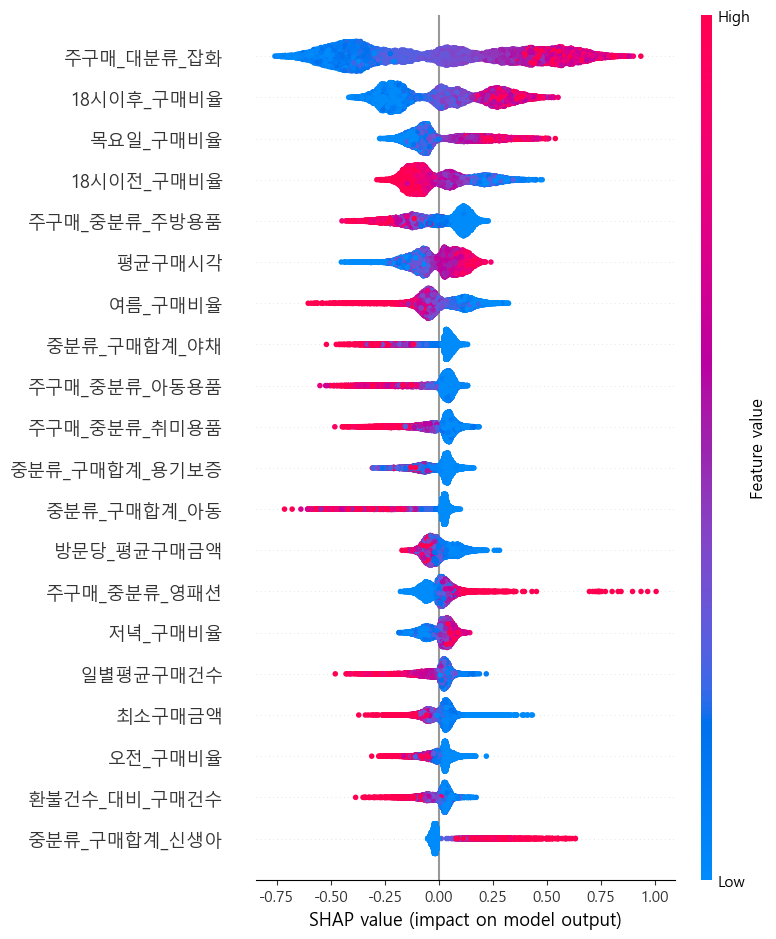

In [342]:
import shap

model = LGBMClassifier(random_state=SEED)
model.fit(train_vt, target)

explainer = shap.Explainer(model)
shap_values = explainer(train_vt)
shap.summary_plot(shap_values, train_vt)

- SelectFromModel

In [343]:
from sklearn.feature_selection import SelectFromModel

In [346]:
rf = RandomForestClassifier(random_state=SEED)

# thresholds = [
#     'mean', 'median',
#     '0.5*mean', '1.5*mean', '2*mean',
#     '0.5*median', '1.5*median', '2*median'
# ]

thresholds = [f"{i}*median" for i in np.arange(1, 2.1, 0.1)]

for threshold in thresholds:
    sfm = SelectFromModel(threshold=threshold, estimator=rf)
    sfm.fit(train_vt, target)
    train_sfm = sfm.transform(train_vt)

    scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"threshold={threshold}, 성능={np.mean(scores)}, 특성 수={train_sfm.shape[1]}")

threshold=1.0*median, 성능=0.7238237828489248, 특성 수=2223
threshold=1.1*median, 성능=0.7221150835889422, 특성 수=2167
threshold=1.2000000000000002*median, 성능=0.7220572596884895, 특성 수=2071
threshold=1.3000000000000003*median, 성능=0.7246873358561633, 특성 수=2001
threshold=1.4000000000000004*median, 성능=0.7250922612632917, 특성 수=1933
threshold=1.5000000000000004*median, 성능=0.72388356034671, 특성 수=1871
threshold=1.6000000000000005*median, 성능=0.7210301506592633, 특성 수=1800
threshold=1.7000000000000006*median, 성능=0.7209872841999279, 특성 수=1744
threshold=1.8000000000000007*median, 성능=0.722750358432834, 특성 수=1702
threshold=1.9000000000000008*median, 성능=0.7240398380972854, 특성 수=1658
threshold=2.000000000000001*median, 성능=0.720939875734944, 특성 수=1609


In [347]:
sfm = SelectFromModel(rf, threshold='1.4*median')
sfm.fit(train_vt, target)

train_sfm = sfm.transform(train_vt)
scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sfm.shape

(0.7250922612632917, (14940, 1933))

In [359]:
train_sfm = pd.DataFrame(train_sfm, columns=train_vt.columns[sfm.get_support()])
test_sfm = sfm.transform(test_vt)
test_sfm = pd.DataFrame(test_sfm, columns=test_vt.columns[sfm.get_support()])

feature_importance = pd.DataFrame({
    'feature': train_sfm.columns,
    'score': sfm.estimator_.feature_importances_[sfm.get_support()]
}).reset_index(drop=True)

feature_importance.sort_values('score', ascending=False).head(30)

,feature,score
33,평균구매시각,0.017314
29,18시이후_구매비율,0.013026
28,18시이전_구매비율,0.012354
46,주구매_대분류_잡화,0.012063
36,저녁_구매비율,0.011947
32,주구매시간대,0.006820
44,주구매_중분류_주방용품,0.006618
1893,방문당_평균구매금액,0.006446
1899,지점코드별_구매합계_std,0.006423
1917,브랜드코드별_구매합계_std,0.006126


- SelectKBest

In [360]:
from sklearn.feature_selection import SelectKBest

In [363]:
for k in range(100, 2001, 100):
    skb = SelectKBest(k=k)
    skb.fit(train_vt, target)
    # skb.fit(train_sfm, target)
    train_skb = skb.transform(train_vt)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=100, 정확도=0.7036177797791104
특성수=200, 정확도=0.7119066934498423
특성수=300, 정확도=0.715745525833255
특성수=400, 정확도=0.7176333264678088
특성수=500, 정확도=0.7192487716706418
특성수=600, 정확도=0.7172602375452373
특성수=700, 정확도=0.7202882356641201
특성수=800, 정확도=0.721797054724609
특성수=900, 정확도=0.7164184034706503
특성수=1000, 정확도=0.7201982323888197
특성수=1100, 정확도=0.7209826551653383
특성수=1200, 정확도=0.7211777661900854
특성수=1300, 정확도=0.7218078472621239
특성수=1400, 정확도=0.7219682211776777
특성수=1500, 정확도=0.7223116513193162
특성수=1600, 정확도=0.7208549953711093
특성수=1700, 정확도=0.7214818775986155
특성수=1800, 정확도=0.7224475713600288
특성수=1900, 정확도=0.7234742671394552
특성수=2000, 정확도=0.7201433270544025


In [371]:
for k in range(1750, 1850, 10):
    skb = SelectKBest(k=k)
    skb.fit(train_vt, target)
    train_skb = skb.transform(train_vt)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=1750, 정확도=0.7256856198875521
특성수=1760, 정확도=0.7256856198875521
특성수=1770, 정확도=0.7267179289662551
특성수=1780, 정확도=0.7216777526292975
특성수=1790, 정확도=0.722364894359095
특성수=1800, 정확도=0.7224475713600288
특성수=1810, 정확도=0.7229957690191405
특성수=1820, 정확도=0.7224856594391985
특성수=1830, 정확도=0.7218369026075214
특성수=1840, 정확도=0.7197814049492275


In [372]:
skb = SelectKBest(k=1770)
skb.fit(train_vt, target)
train_skb = skb.transform(train_vt)

scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_skb.shape

(0.7267179289662551, (14940, 1770))

In [373]:
feature_scores = pd.DataFrame(
    {'feature': train_vt.columns,
     'score': skb.scores_}
).sort_values('score', ascending=False)

feature_scores.head(50)

,feature,score
46,주구매_대분류_잡화,1613.989214
33,평균구매시각,1420.010188
29,18시이후_구매비율,1388.950728
28,18시이전_구매비율,1388.950728
36,저녁_구매비율,1242.518730
44,주구매_중분류_주방용품,839.961756
32,주구매시간대,761.891833
35,점심_구매비율,597.480912
39,중분류_nunique,582.293480
4406,지점코드별_구매횟수_std,516.644923


- SelectPercentile

In [364]:
from sklearn.feature_selection import SelectPercentile

In [365]:
percentiles = [i for i in range(5, 101, 5)]

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    sp.fit(train_vt, target)
    # sp.fit(train_sfm, target)
    train_sp = sp.transform(train_vt)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=5, 성능=0.7142490173380194, 특성 수=223
percentile=10, 성능=0.7181538386272017, 특성 수=445
percentile=15, 성능=0.7172277889815011, 특성 수=667
percentile=20, 성능=0.7193981702372371, 특성 수=889
percentile=25, 성능=0.7216630562300486, 특성 수=1111
percentile=30, 성능=0.7195521199844016, 특성 수=1334
percentile=35, 성능=0.7196505140222185, 특성 수=1556
percentile=40, 성능=0.7264328095387824, 특성 수=1778
percentile=45, 성능=0.7201433270544025, 특성 수=2000
percentile=50, 성능=0.7216491938066716, 특성 수=2222
percentile=55, 성능=0.7210326131082418, 특성 수=2445
percentile=60, 성능=0.7224472224479472, 특성 수=2667
percentile=65, 성능=0.7196179036815487, 특성 수=2889
percentile=70, 성능=0.7226413269808913, 특성 수=3111
percentile=75, 성능=0.7229188047237175, 특성 수=3333
percentile=80, 성능=0.7221920555628384, 특성 수=3556
percentile=85, 성능=0.7257416800658438, 특성 수=3778
percentile=90, 성능=0.7227138630615716, 특성 수=4000
percentile=95, 성능=0.722339550766551, 특성 수=4222
percentile=100, 성능=0.7232198482763996, 특성 수=4445


In [368]:
percentiles = [i for i in range(36, 45)]

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    sp.fit(train_vt, target)
    # sp.fit(train_sfm, target)
    train_sp = sp.transform(train_vt)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=36, 성능=0.7208549953711093, 특성 수=1600
percentile=37, 성능=0.7233218808297857, 특성 수=1645
percentile=38, 성능=0.7228236867873756, 특성 수=1689
percentile=39, 성능=0.7256856198875521, 특성 수=1734
percentile=40, 성능=0.7264328095387824, 특성 수=1778
percentile=41, 성능=0.7230577286365973, 특성 수=1823
percentile=42, 성능=0.7229650944305644, 특성 수=1867
percentile=43, 성능=0.7234931269455931, 특성 수=1911
percentile=44, 성능=0.7193100058827617, 특성 수=1956


In [369]:
sp = SelectPercentile(percentile=40)
sp.fit(train_vt, target)
train_sp = sp.transform(train_vt)

scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sp.shape

(0.7264328095387824, (14940, 1778))

- PCA

In [379]:
from sklearn.decomposition import PCA

In [380]:
pca = PCA(0.95, random_state=SEED)
pca.fit(train_vt)
pca_train = pca.transform(train_vt)

scores = cross_val_score(model, pca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca_train.shape

(0.658888418457443, (14940, 165))

- 위에서 축소한 데이터에 대해 PCA

In [381]:
pca2 = PCA(0.95, random_state=SEED)
pca2.fit(train_sp)
pca2_train = pca2.transform(train_sp)

scores = cross_val_score(model, pca2_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca2_train.shape

(0.6648554137245976, (14940, 138))

- KernelPCA

In [732]:
# from sklearn.decomposition import KernelPCA

# kpca = KernelPCA(kernel='rbf', random_state=SEED)
# kpca.fit(train_vt)
# kpca_train = kpca.transform(train_vt)

# scores = cross_val_score(model, kpca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), kpca_train.shape

(0.6439016087704589, (2988, 11951))

- LDA

In [382]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    pca2_train, target, test_size=0.2, random_state=SEED
)

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)

scores = cross_val_score(model, X_train_lda, y_train, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), X_train_lda.shape

(0.6454252416555839, (11952, 1))

In [383]:
scores = cross_val_score(model, X_val_lda, y_val, cv=cv, scoring='f1_macro', n_jobs=-1)
np.mean(scores)

0.6178109324836383

- RFE

In [386]:
from sklearn.feature_selection import RFE

rfe = RFE(model, step=10, n_features_to_select=100, verbose=2)
rfe.fit(train_vt, target)
train_rfe = rfe.transform(train_vt)

scores = cross_val_score(model, train_rfe, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_rfe.shape

Fitting estimator with 4445 features.
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136224
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 3077
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
Fitting estimator with 4435 features.
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135908
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 3071
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initsc

(0.7159000406352287, (14940, 100))

In [71]:
# df = pd.DataFrame({
#     "Feature": train_vt.columns[rfe.support_],
#     "Importance": rfe.estimator_.feature_importances_
# }).sort_values(by="Importance", ascending=False)

# df.head(30)

- RFECV

In [387]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(model, step=10, cv=cv, scoring="f1_macro", n_jobs=-1)
rfecv.fit(train_sp, target)
train_rfecv = rfecv.transform(train_sp)

scores = cross_val_score(model, train_rfecv, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_rfecv.shape

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98040
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1715
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98006
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 1706
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995


(0.7269411601826341, (14940, 558))

In [75]:
df = pd.DataFrame({
    "Feature": train_vt.columns[rfecv.support_],
    "Importance": rfecv.estimator_.feature_importances_
}).sort_values(by="Importance", ascending=False)

df.head(50)

,Feature,Importance
9,목요일_구매비율,51
77,주구매_대분류_잡화,46
71,주구매_중분류_아동용품,39
75,주구매_중분류_주방용품,34
43,여름_구매비율,32
445,환불건수_대비_구매건수,29
74,주구매_중분류_영패션,29
72,주구매_중분류_취미용품,27
57,18시이전_구매비율,27
62,평균구매시각,27


- 최종적으로 모델에 넣을 학습데이터

In [388]:
train_ft = rfecv.transform(train_sp)
test_sp = sp.transform(test_vt)
test_ft = rfecv.transform(test_sp)

train_ft.shape, test_ft.shape

((14940, 558), (12225, 558))

In [389]:
train_ft_df = pd.DataFrame(train_ft)
train_ft_df.to_csv(f"{DATA_PATH}selected_train.csv", index=False)
test_ft_df = pd.DataFrame(test_ft)
test_ft_df.to_csv(f"{DATA_PATH}selected_test.csv", index=False)

# 모델 선택

In [257]:
train_ft = pd.read_csv(f"{DATA_PATH}selected_train.csv")
test_ft = pd.read_csv(f"{DATA_PATH}selected_test.csv")

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(
    train_ft, target, test_size=0.2, random_state=SEED, stratify=target, shuffle=True
)

In [391]:
model = LGBMClassifier(random_state=SEED)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

f1_score(y_train, train_pred, average='macro'), f1_score(y_val, val_pred, average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66460
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 558
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(0.8695868966838151, 0.720669615751583)

- LogisticRegression

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [270]:
# params = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [1000, 2000, 3000],
# }

# lr = LogisticRegression(**params, random_state=SEED)

# random_search = RandomizedSearchCV(
#     estimator=lr,
#     param_distributions=params,
#     n_iter=20,
#     cv=cv,
#     scoring='f1_macro',
#     n_jobs=-1,
#     verbose=2
# )

# random_search.fit(X_train, y_train)
# f1_score(y_train, random_search.predict(X_train), average='macro'), f1_score(y_val, random_search.predict(X_val), average='macro')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


(0.7765872820108038, 0.6990132043463444)

In [280]:
# random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 3000, 'C': 0.1}

In [281]:
# params = {"solver": "liblinear", "penalty": "l1", "max_iter": 3000, "C": 0.1}

# lr = LogisticRegression(**params, random_state=SEED)
# lr.fit(train_ft, target)

LogisticRegression(C=0.1, max_iter=3000, penalty='l1', random_state=42,
                   solver='liblinear')

In [290]:
# pred_lr = lr.predict_proba(test_ft)[:, 1]
# pred_lr.shape

(12225,)

- LGBMClassifier

In [450]:
params = {
    'num_leaves': 256,
    'max_depth': -1,
    'min_child_samples': 5,
    'is_unbalance': True,
}

lgbm = LGBMClassifier(**params, random_state=SEED)
lgbm.fit(X_train, y_train)
f1_score(y_train, lgbm.predict(X_train), average='macro'), f1_score(y_val, lgbm.predict(X_val), average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66460
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 558
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(1.0, 0.7381369252312411)

In [451]:
pred_lgbm = lgbm.predict_proba(test_ft)[:, 1]
pred_lgbm.shape

(12225,)

- XGBoost

In [452]:
from xgboost import XGBClassifier

In [465]:
params = {
    'max_depth': 7,
    'learning_rate': 0.02,
    'n_estimators': 4000,
    'min_child_weight': 2,
    'colsample_bytree': 0.75,
    'subsample': 0.75,
    'alpha': 0.8,
    'lambda': 1.5,
    'scale_pos_weight': 2,
    'gamma': 0.5,
}

xgb = XGBClassifier(**params, random_state=SEED)
xgb.fit(X_train, y_train)
f1_score(y_train, xgb.predict(X_train), average='macro'), f1_score(y_val, xgb.predict(X_val), average='macro')

(0.9994740902623975, 0.7376265328534666)

In [466]:
pred_xgb = xgb.predict_proba(test_ft)[:, 1]
pred_xgb.shape

(12225,)

- RandomForestClassifier

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [474]:
params = {
    'n_estimators': 3000,
    'max_depth': 12,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': 0.7,
    'bootstrap': True,
    'class_weight': 'balanced',
    'criterion': 'entropy',
    'max_leaf_nodes': 1000,
    'oob_score': True,
    'n_jobs': -1,
}

rf = RandomForestClassifier(**params, random_state=SEED)
rf.fit(X_train, y_train)
f1_score(y_train, rf.predict(X_train), average='macro'), f1_score(y_val, rf.predict(X_val), average='macro')

(0.9110232440889681, 0.7238500314874399)

# 앙상블

- 스태킹

In [475]:
from sklearn.ensemble import StackingClassifier

params = {
    'estimators': [('lgbm', lgbm), ('xgb', xgb)],
    'final_estimator': LogisticRegression(random_state=SEED),
    'cv': cv,
    'n_jobs': -1
}

stacking = StackingClassifier(**params)

scores = cross_val_score(stacking, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

KeyboardInterrupt: 

- 보팅

In [476]:
from sklearn.ensemble import VotingClassifier

params = {
    'estimators': [('lgbm', lgbm), ('xgb', xgb)],
    'voting': 'soft'
}

voting = VotingClassifier(**params)

scores = cross_val_score(voting, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

KeyboardInterrupt: 

- 예측값 확률로 출력

In [301]:
voting.fit(train_ft, target)
pred = voting.predict(test_ft)
submit["target"] = pred

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85077
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 650
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


# cv 점수 확인해보기

In [70]:
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7177806272826338

# 모델 학습

In [90]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft, target)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127586
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 2209
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

# 테스트 데이터 예측

In [91]:
pred = model.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [563]:
# pred = model.predict_proba(test_ft)[:,1]
# pred

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [113]:
submit["target"] = pred
submit

,ID,target
0,test_0,0.0
1,test_1,1.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


- 예측 결과를 csv 파일로 저장하여 제출

In [480]:
submit.to_csv(f"{DATA_PATH}submit.csv",index=False)